# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

## TODO
1. some trajectories may not start on the boundaries. Remove those
2. some local transformations may fail. Check the validity of the first row after transformation

In [1]:
dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"
# dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2/lab"

dataDir = "/home/office/AV/DataSetExploration/data/ind/location-2/csv"

In [2]:
exec(open('init_notebook.py').read())

current working dir/home/office/AV/DataSetExploration/TTI-dataset-tools/src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [5]:
sceneId = 31
date = "2022-12-22"
fps=5
minYDisplacement = 3.5
maxXDisplacement = 6
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))

In [6]:
visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed'
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)

In [7]:
pedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,18,22293,18334,31,6.0,4.619954,-0.097920,0.934893,0.978151,-0.319701,0.132384
1,18,22298,18334,31,6.0,4.425630,-0.286898,0.971621,0.944891,-0.183639,0.166300
2,18,22303,18334,31,6.0,4.219343,-0.470351,1.031439,0.917262,-0.299090,0.138144
3,18,22308,18334,31,6.0,4.003183,-0.650427,1.080800,0.900383,-0.246806,0.084396
4,18,22313,18334,31,6.0,3.773854,-0.818616,1.146641,0.840945,-0.329204,0.297186


In [8]:
# print(pedDf["uniqueTrackId"].unique())

In [9]:
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
pedDf.describe()

translating track 18334
translating track 19019
translating track 19093
translating track 19232
translating track 19302
translating track 21112
translating track 21328
translating track 21359
translating track 22016
translating track 22101
translating track 23077
translating track 23205
translating track 23391
translating track 24129
translating track 24241
translating track 25032
translating track 26169
translating track 29209
translating track 29431


,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
count,481.000000,481.000000,481.000000,481.0,481.0,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,22.334719,9615.004158,22511.218295,31.0,6.0,0.680888,-0.105526,0.022548,0.057430,-0.007939,0.028814,1.287043,2.022477,2.730259
std,2.737513,7654.533684,2759.086196,0.0,0.0,2.436389,1.766208,0.816028,1.041107,0.251766,0.264703,0.306088,1.763294,1.854428
min,18.000000,10.000000,18334.000000,31.0,6.0,-4.008711,-3.128256,-1.607051,-1.709948,-1.418347,-1.216581,0.061354,0.000000,0.000000
25%,19.000000,3823.000000,19302.000000,31.0,6.0,-1.336165,-1.637402,-0.705164,-1.024109,-0.157156,-0.131916,1.142527,0.495839,1.071644
50%,23.000000,7363.000000,23077.000000,31.0,6.0,0.852045,-0.064480,-0.121145,0.597250,-0.016945,0.000642,1.299514,1.577459,2.629489
75%,24.000000,17564.000000,24129.000000,31.0,6.0,2.639597,1.305477,0.851186,0.900383,0.149094,0.178294,1.477061,3.178068,4.353011
max,29.000000,22431.000000,29431.000000,31.0,6.0,4.957891,3.091342,1.320176,1.547726,0.821041,1.193489,1.992478,7.599619,6.032311


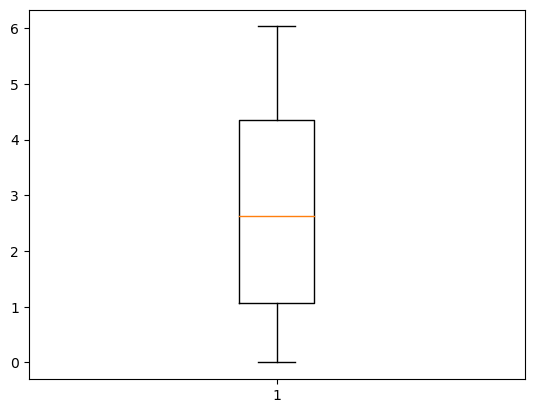

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5a8f1c6910>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5a8f1c6d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5a8f1c6670>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5a8f1d62e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5a8f1d6580>],
 'means': []}

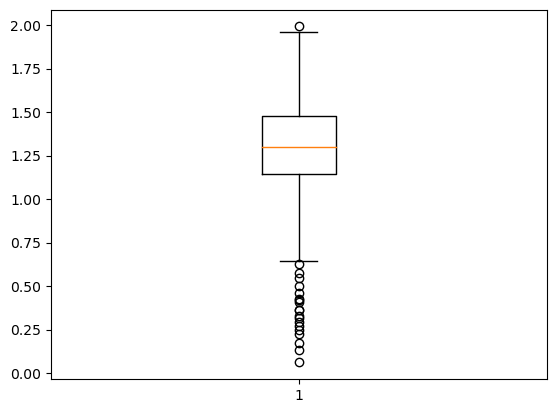

In [10]:
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

In [11]:
# outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=True, returnVals=True)
# outliers.index

In [12]:
# outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=False, returnVals=True)
# outliers

In [13]:
# outliers = cleaner.getOutliersByYDisplacement(pedDf, byIQR=False, returnVals=True)
# outliers

using min Y displacement (3.5)


,displacementY
uniqueTrackId,
18334,2.629489
21112,1.701866
21359,1.108712
24241,2.183576
29209,0.816022


In [14]:
# ped19019 = pedDf[pedDf["uniqueTrackId"] == 19019]
# firstRow = ped19019.iloc[0]
# firstRow

recordingId              19.000000
frame                  1130.000000
uniqueTrackId         19019.000000
sceneId                  31.000000
roadWidth                 6.000000
sceneX                    1.747113
sceneY                    2.889699
sceneXVelocity           -0.797745
sceneYVelocity            0.923351
sceneXAcceleration       -0.055835
sceneYAcceleration       -0.066258
speed                     1.220235
displacementX             0.000000
displacementY             0.000000
Name: 18, dtype: float64

In [15]:
# dX, dY = transformer.translateOneToLocalSource(ped19019)
# print(list(zip(dX, dY)))

[(0.0, 0.0), (0.14978065563197673, -0.18044190560525442), (0.2905635698831368, -0.35685601404034983), (0.42819540366755016, -0.5341212346256055), (0.5584818657970358, -0.7057576351523682), (0.678662403251161, -0.8754648165479568), (0.7919863472297037, -1.0508742103133673), (0.8924844209515523, -1.2268209607187053), (0.9819747866000221, -1.404333457901588), (1.0654212420604225, -1.5842222020494483), (1.1329939935784306, -1.7524450118948647), (1.1927896165846512, -1.910300142534628), (1.2574418014989446, -2.061987363769009), (1.3321673237656042, -2.210486047002148), (1.4173329292974568, -2.3790971706992274), (1.5143344009164328, -2.5552507392232657), (1.6208229039833113, -2.7213581575241217), (1.7317366946654604, -2.878982131387603), (1.8474630387445465, -3.0332422042713243), (1.9664199347379183, -3.184755199739107), (2.08363625715751, -3.3332138534391413), (2.2021856372679145, -3.4804930762624533), (2.3165644998472374, -3.6287758844199107), (2.427575331166827, -3.7701552104535763), (2.5

In [16]:
# ped19019.tail()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
54,19,1310,19019,31,6.0,4.949202,-2.798084,-0.093651,0.492557,-0.023562,0.358619,0.501381,3.202090,5.687783
55,19,1315,19019,31,6.0,4.957891,-2.881790,-0.043443,0.418530,-0.251041,0.370134,0.420779,3.210778,5.771489
56,19,1320,19019,31,6.0,4.950590,-2.947009,0.036508,0.326098,-0.399755,0.462163,0.328135,3.203477,5.836708
57,19,1325,19019,31,6.0,4.929987,-2.997521,0.103011,0.252557,-0.332514,0.367703,0.272757,3.182874,5.887220
58,19,1330,19019,31,6.0,4.902643,-3.032758,0.136720,0.176187,-0.168548,0.381849,0.223012,3.155530,5.922457


In [17]:
# print(len(outliers), 'vs', len(pedDf["uniqueTrackId"].unique()))

In [18]:
# outliers = cleaner.getOutliersByXDisplacement(pedDf, byIQR=False, returnVals=True)
# outliers

In [19]:
# cleanPedDf = cleaner.cleanBySpeed(pedDf, byIQR=True)
# cleanPedDf2 = cleaner.cleanBySpeed(pedDf, byIQR=False)
# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf2, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

using min Y displacement (3.5)


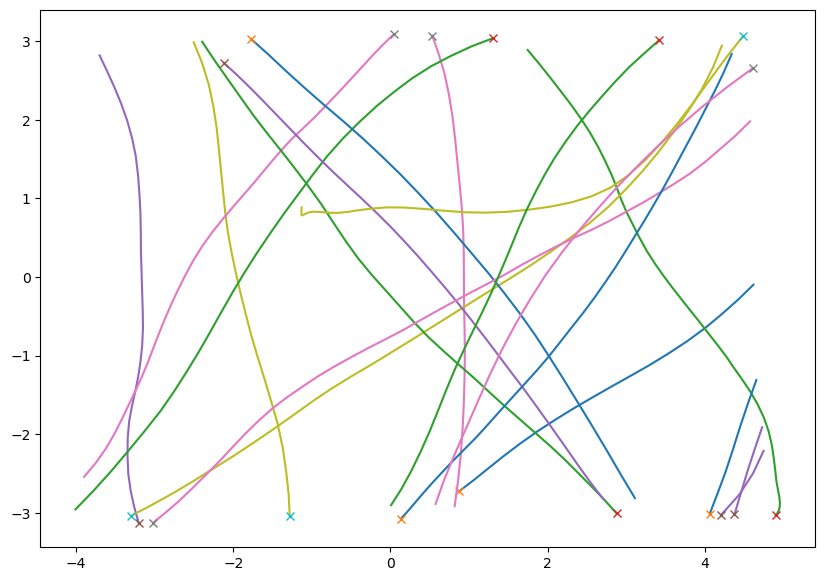

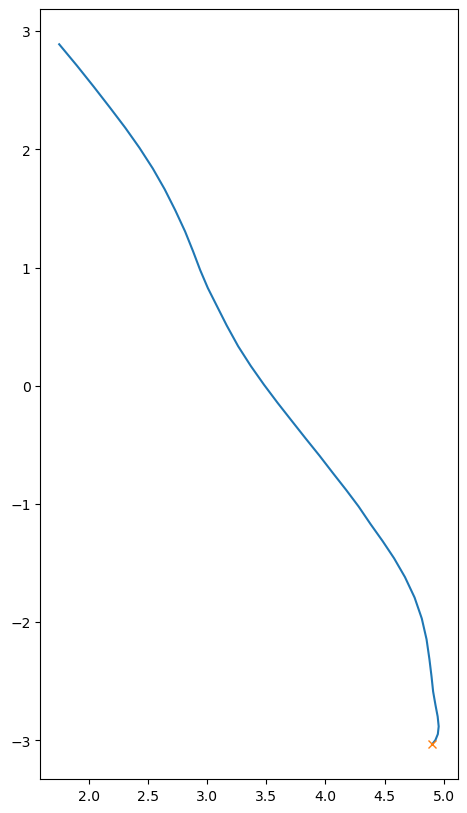

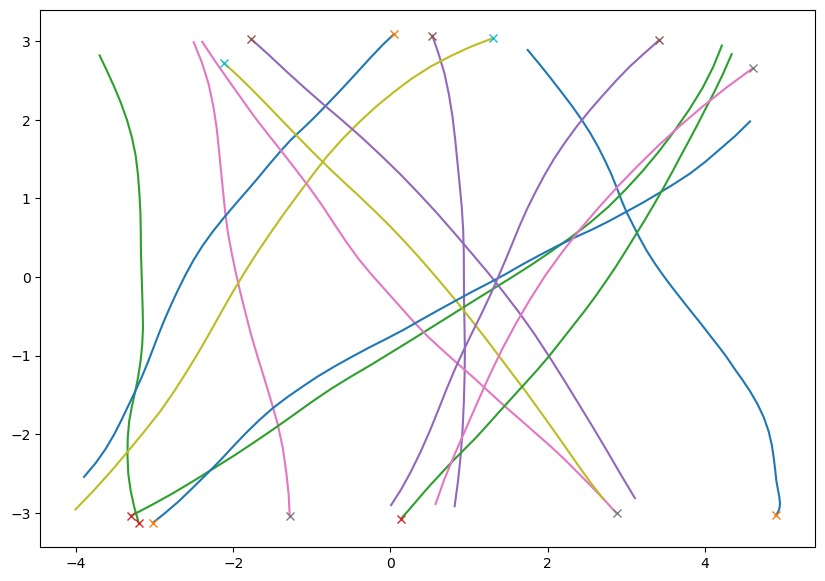

In [20]:
cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY', trackIds=[19019])
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

In [21]:
allPedIds = list(cleanPedDf["uniqueTrackId"].unique())

In [22]:
transformer.translateAllToLocalSource(cleanPedDf)

translating track 19019
translating track 19093
translating track 19232
translating track 19302
translating track 21328
translating track 22016
translating track 22101
translating track 23077
translating track 23205
translating track 23391
translating track 24129
translating track 25032
translating track 26169
translating track 29431


In [23]:
cleanPedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
18,19,1130,19019,31,6.0,1.747113,2.889699,-0.797745,0.923351,-0.055835,-0.066258,1.220235,0.000000,0.000000,0.000000,0.000000
19,19,1135,19019,31,6.0,1.896894,2.709257,-0.748903,0.902210,-0.244210,0.105705,1.172535,0.149781,0.180442,0.149781,-0.180442
20,19,1140,19019,31,6.0,2.037677,2.532843,-0.703915,0.882071,-0.224944,0.100695,1.128514,0.290564,0.356856,0.290564,-0.356856
21,19,1145,19019,31,6.0,2.175308,2.355577,-0.688159,0.886326,-0.078777,-0.021278,1.122113,0.428195,0.534121,0.428195,-0.534121
22,19,1150,19019,31,6.0,2.305595,2.183941,-0.651432,0.858182,-0.183634,0.140721,1.077423,0.558482,0.705758,0.558482,-0.705758


In [24]:
# trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"]==allPedIds[0]]
# visualizer.show(trackDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
# transformer.rotate(trackDf)
# visualizer.show(trackDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [25]:
tracksMeta.head()

,uniqueTrackId,initialFrame,finalFrame,numFrames,class,horizontalDirection,verticalDirection
0,18334,22293,22378,18,pedestrian,WEST,SOUTH
1,19019,1130,1330,41,pedestrian,EAST,SOUTH
2,19093,5725,5860,28,pedestrian,EAST,SOUTH
3,19232,16651,16751,21,pedestrian,WEST,NORTH
4,19302,21219,21329,23,pedestrian,EAST,SOUTH


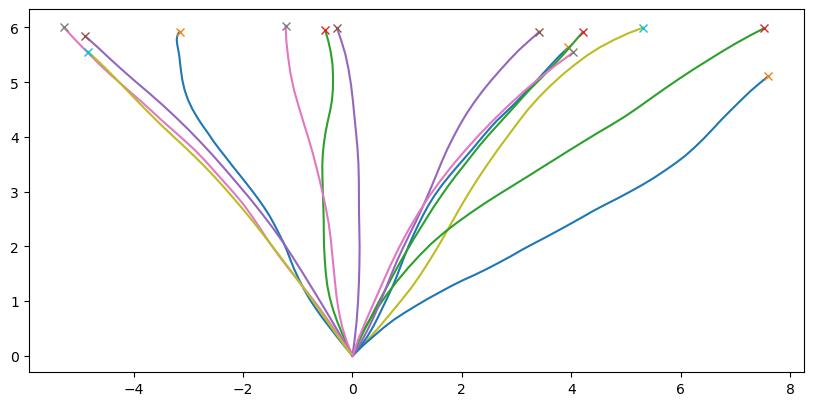

In [26]:
southIds = []
for pedId in allPedIds:
    trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"] == pedId]
    trackMeta = tracksMeta[tracksMeta["uniqueTrackId"] == pedId].iloc[0]
    # print(trackMeta['verticalDirection'])
    if trackMeta['verticalDirection'] == "SOUTH":
        southIds.append(pedId)
        # print(trackMeta["uniqueTrackId"])
        X, Y = transformer.rotate180(trackDf)
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localX'] = X
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localY'] = Y

visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

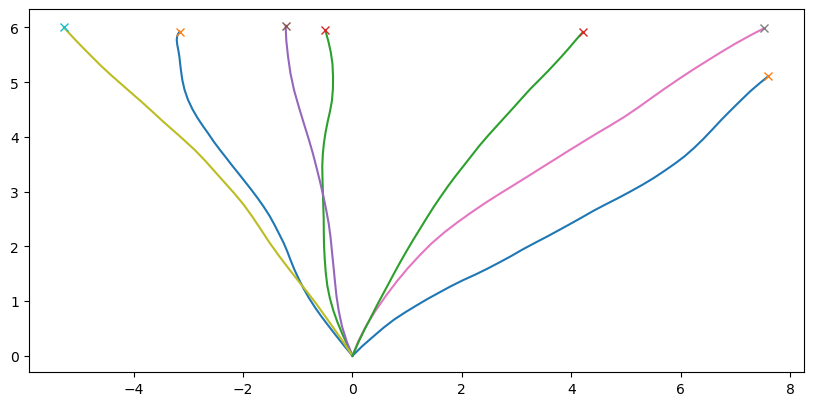

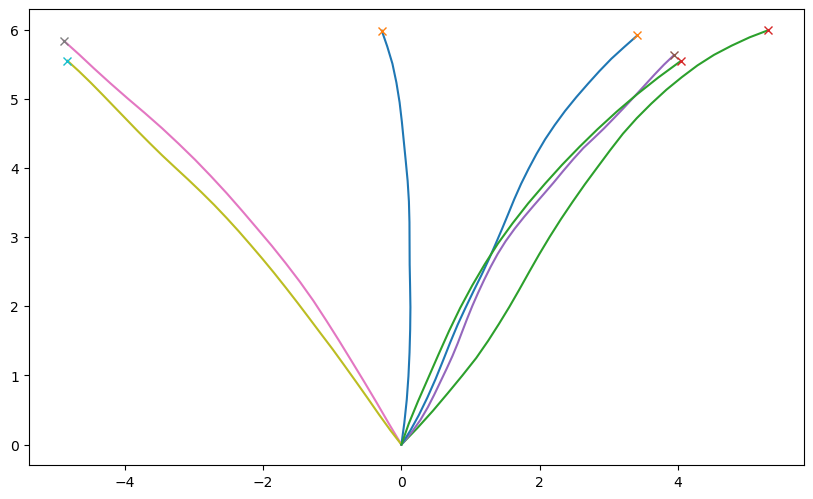

In [27]:
southPeds = cleanPedDf[cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(southPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
northPeds = cleanPedDf[~cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(northPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [28]:
cleanPedDf[cleanPedDf["uniqueTrackId"] == southIds[0]].head(10)

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
18,19,1130,19019,31,6.0,1.747113,2.889699,-0.797745,0.923351,-0.055835,-0.066258,1.220235,0.000000,0.000000,-0.000000,-0.000000
19,19,1135,19019,31,6.0,1.896894,2.709257,-0.748903,0.902210,-0.244210,0.105705,1.172535,0.149781,0.180442,-0.149781,0.180442
20,19,1140,19019,31,6.0,2.037677,2.532843,-0.703915,0.882071,-0.224944,0.100695,1.128514,0.290564,0.356856,-0.290564,0.356856
21,19,1145,19019,31,6.0,2.175308,2.355577,-0.688159,0.886326,-0.078777,-0.021278,1.122113,0.428195,0.534121,-0.428195,0.534121
22,19,1150,19019,31,6.0,2.305595,2.183941,-0.651432,0.858182,-0.183634,0.140721,1.077423,0.558482,0.705758,-0.558482,0.705758
23,19,1155,19019,31,6.0,2.425775,2.014234,-0.600903,0.848536,-0.252648,0.048230,1.039758,0.678662,0.875465,-0.678662,0.875465
24,19,1160,19019,31,6.0,2.539099,1.838825,-0.566620,0.877047,-0.171415,-0.142555,1.044160,0.791986,1.050874,-0.791986,1.050874
25,19,1165,19019,31,6.0,2.639597,1.662878,-0.502490,0.879734,-0.320647,-0.013434,1.013128,0.892484,1.226821,-0.892484,1.226821
26,19,1170,19019,31,6.0,2.729088,1.485365,-0.447452,0.887562,-0.275193,-0.039144,0.993972,0.981975,1.404333,-0.981975,1.404333
27,19,1175,19019,31,6.0,2.812534,1.305477,-0.417232,0.899444,-0.151098,-0.059406,0.991505,1.065421,1.584222,-1.065421,1.584222


In [29]:
startingDf = cleanPedDf[cleanPedDf["displacementY"] < 1]

In [30]:
startingDf.head(10)

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
18,19,1130,19019,31,6.0,1.747113,2.889699,-0.797745,0.923351,-0.055835,-0.066258,1.220235,0.000000,0.000000,-0.000000,-0.000000
19,19,1135,19019,31,6.0,1.896894,2.709257,-0.748903,0.902210,-0.244210,0.105705,1.172535,0.149781,0.180442,-0.149781,0.180442
20,19,1140,19019,31,6.0,2.037677,2.532843,-0.703915,0.882071,-0.224944,0.100695,1.128514,0.290564,0.356856,-0.290564,0.356856
21,19,1145,19019,31,6.0,2.175308,2.355577,-0.688159,0.886326,-0.078777,-0.021278,1.122113,0.428195,0.534121,-0.428195,0.534121
22,19,1150,19019,31,6.0,2.305595,2.183941,-0.651432,0.858182,-0.183634,0.140721,1.077423,0.558482,0.705758,-0.558482,0.705758
23,19,1155,19019,31,6.0,2.425775,2.014234,-0.600903,0.848536,-0.252648,0.048230,1.039758,0.678662,0.875465,-0.678662,0.875465
59,19,5725,19093,31,6.0,-3.700989,2.820415,-0.444987,0.912855,0.003279,-0.379050,1.015538,0.000000,0.000000,-0.000000,-0.000000
60,19,5730,19093,31,6.0,-3.609928,2.628404,-0.455303,0.960056,0.051577,-0.236009,1.062548,0.091061,0.192011,-0.091061,0.192011
61,19,5735,19093,31,6.0,-3.517382,2.425482,-0.462732,1.014612,0.037147,-0.272779,1.115150,0.183607,0.394934,-0.183607,0.394934
62,19,5740,19093,31,6.0,-3.429185,2.213539,-0.440987,1.059713,-0.108726,-0.225502,1.147807,0.271804,0.606876,-0.271804,0.606876


In [31]:
startingDf[["uniqueTrackId", "frame"]].groupby(["uniqueTrackId"]).count()

,frame
uniqueTrackId,
19019,6
19093,5
19232,4
19302,4
21328,5
22016,6
22101,4
23077,4
23205,5


In [32]:
startingDf[["uniqueTrackId", "frame"]]

,uniqueTrackId,frame
18,19019,1130
19,19019,1135
20,19019,1140
21,19019,1145
22,19019,1150
...,...,...
433,26169,7383
461,29431,22336
462,29431,22341
463,29431,22346
